#Introduction

##MNIST Dataset
MNIST is ‘Modified National Institute of Standards and Technology’. This database consists of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems.

#1. Importing Dataset

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#2. Split the Dataset into Training and Testing Data.

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape) # 60,000 grayscale images with a size of 28x28
print(y_train.shape) # 60,000 labels for each grayscale images in X_train.
print(X_test.shape) # 10,000 grayscale images with a size of 28x28
print(y_test.shape) # 10,000 labels for each grayscale images in X_test.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 2.1. Display an image from the X_train dataset using the matplotlib library.

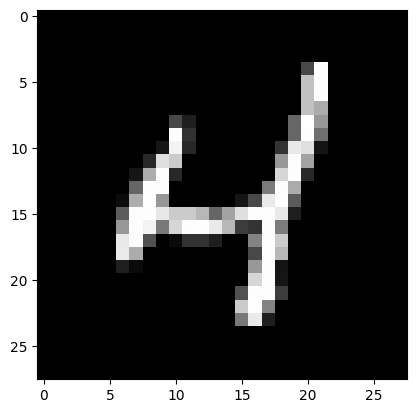

In [ ]:
import matplotlib.pyplot as plt

index = 19564
# print(X_train[index]) # Returns the array of 28x28 index sample(use matplotlib to view image)
# print(y_train[index]) # Returns the label of the index sample

index_image = X_train[index]
plt.imshow(index_image, cmap='gray')
plt.axis('on')
plt.show()

#3. Flatten the images by reshaping them from a 2D array of 28x28 to a 1D array of 784 (28*28).

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#4. Normalize the training and testing datasets to the range of 0 to 1 for improved model generalization.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

index_image = X_train[index]
# print(index_image)

#5. To align the dataset labels with the network's output layer, preprocess the output data labels from an nx1 format to an nx10 format, where each label represents a class from 0 to 9.

In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train[index])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_train[index])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#6. Model Building - CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.optimizers import Adam
import numpy as np

In [ ]:
# Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST digits


In [ ]:
# Compile model
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=2, batch_size=10000)

Epoch 1/2
6/6 [==============================] - 173s 27s/step - loss: 2.0366 - accuracy: 0.4480
Epoch 2/2
6/6 [==============================] - 158s 26s/step - loss: 0.5374 - accuracy: 0.8346


In [ ]:
# Evaluate model
scores = model.evaluate(X_test, y_test)
print('Accuracy: ', scores[1] * 100)

313/313 [==============================] - 8s 25ms/step - loss: 0.3075 - accuracy: 0.9093
Accuracy:  90.93000292778015


#9. Utilize the Model to make Predictions on the Dataset.

In [ ]:
# Show example predictions
print("Example predictions:")
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)
print("Predicted labels:", predicted_labels)
print("True labels:     ", true_labels)

Example predictions:
1/1 [==============================] - 0s 27ms/step
Predicted labels: [7 2 1 0 4]
True labels:      [7 2 1 0 4]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               4718720   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4738826 (18.08 MB)
Trainable params: 4738826 (18.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#10. Save the model architecture and the trained weights.

In [ ]:
def save(model):
    # Save the trained weights
    model.save_weights('model_weights.h5')

    # Save the model architecture
    with open('model_architecture.json', 'w') as f:
        f.write(model.to_json())

    # Save the tokenizer
    # with open('tokenizer.json', 'w') as f:
    #     f.write(tokenizer.to_json())

save(model)



In [ ]:
! pip install visualkeras
! pip3 install ann_visualizer
! pip install graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=8b6a5a71ae97696888a14f7dd7a0b25461d290127e057cb1b90fb604f2ad2a54
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from keras.models import load_model
import keras
from keras.models import model_from_json

json_file =  'ann.json'
weights = 'ann_weights.h5'

def models():
    # Model reconstruction from JSON file
    with open(json_file, 'r') as f:
        model = model_from_json(f.read())

    # Load weights into the new model
    model.load_weights(weights)

    return model

model = models()


In [ ]:
import visualkeras
visualkeras.layered_view(model)

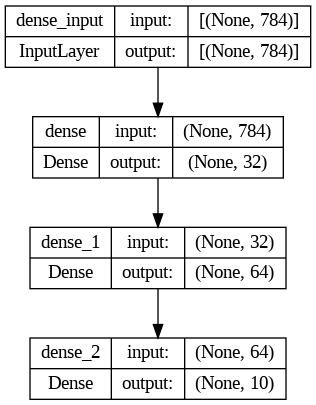

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="iris_model.png", show_shapes=True)